## R-Bloggers - Topic Modeling

### Importation des librairies

In [107]:
import umap
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import umap.umap_ as umap
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 12})

### Importation du jeu de données

In [5]:
df = pd.read_csv('data/data_text.csv', sep = "\t")
df.index = df.title
data = df['text']
data.head()

title
Easily Converting Strings to Times and Dates in R with flipTime               Date conversion in R can be a real pain. Howev...
The importance of context                                                     When we do modeling it’s of utmost importance ...
PCA in a tidy(verse) framework                                                The other day, a question was posted on RStudi...
Our Logo In R                                                                 Hi all, so given our logo here at Jumping Rive...
I talk about machine learning with Daniel Mies (Podcast in German, though)    For those of you out there who speak German: I...
Name: text, dtype: object

In [6]:
df.head()

,Unnamed: 0,title,link,date,author,text,comment_rbloggers
title,,,,,,,
Easily Converting Strings to Times and Dates in R with flipTime,0,Easily Converting Strings to Times and Dates i...,https://www.r-bloggers.com/2018/01/easily-conv...,"January 31, 2018",Mathew McLean,Date conversion in R can be a real pain. Howev...,0 Comments
The importance of context,1,The importance of context,https://www.r-bloggers.com/2018/01/the-importa...,"January 31, 2018",Dr. Michael Green,When we do modeling it’s of utmost importance ...,0 Comments
PCA in a tidy(verse) framework,2,PCA in a tidy(verse) framework,https://www.r-bloggers.com/2018/01/pca-in-a-ti...,"January 31, 2018",Rstats on goonR blog,"The other day, a question was posted on RStudi...",0 Comments
Our Logo In R,4,Our Logo In R,https://www.r-bloggers.com/2018/01/our-logo-in...,"January 31, 2018",R on The Jumping Rivers Blog,"Hi all, so given our logo here at Jumping Rive...",0 Comments
"I talk about machine learning with Daniel Mies (Podcast in German, though)",5,I talk about machine learning with Daniel Mies...,https://www.r-bloggers.com/2018/01/i-talk-abou...,"January 31, 2018",Dr. Shirin Glander,For those of you out there who speak German: I...,0 Comments


### Word Embeddings

In [ ]:
model = SentenceTransformer('paraphrase-MiniLM-L12-v2')
embeddings = model.encode(data, show_progress_bar=True )

### Importation des embeddings

In [7]:
embeddings = np.load("data/embeddings-paraphrase-MiniLM-L12-v2.npy")
embeddings.shape

(28544, 384)

### Reduction de dimension des embeddings avec UMAP

In [8]:
umap_2d = umap.UMAP(n_neighbors=9,
                    n_components=2,
                    min_dist=0.1,
                    metric='cosine').fit_transform(embeddings)

umap_embeddings = umap.UMAP(n_neighbors=9,
                    n_components=5,
                    min_dist=0.1,
                    metric='cosine').fit_transform(embeddings)


### Recherche des meilleurs hyperparamètres pour HDBSCAN

In [9]:
import hdbscan

hdbscan_prams = {
    'min_samples': [5,10,20,30,40,50,60,70],
    'min_cluster_size': [5,10,20,30,40,50,60,70]
}

results = {"min_samples" : [],
           "min_cluster_size" : [],
           "n_clusters" : [],
            "outliers" : [],
              "silhouette_score" : []}

for min_samples in hdbscan_prams['min_samples']:
    for min_cluster_size in hdbscan_prams['min_cluster_size']:
        model = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size, min_samples = min_samples).fit(umap_embeddings)

        results["min_samples"].append(min_samples)
        results["min_cluster_size"].append(min_cluster_size)
        
        results["n_clusters"].append(len(np.unique(model.labels_)))
        results["outliers"].append(np.sum(model.labels_ == -1) / len(df))
        results["silhouette_score"].append(silhouette_score(umap_embeddings[model.labels_ != -1], model.labels_[model.labels_ != -1]))

In [10]:
pd.set_option('display.max_rows', None)
pd.DataFrame(results)

,min_samples,min_cluster_size,n_clusters,outliers,silhouette_score
0,5,5,803,0.436974,0.554346
1,5,10,449,0.405795,0.535365
2,5,20,219,0.393147,0.500108
3,5,30,149,0.402642,0.507846
4,5,40,113,0.419668,0.517113
5,5,50,94,0.418967,0.520391
6,5,60,81,0.394654,0.492255
7,5,70,69,0.400610,0.492145
8,10,5,399,0.443105,0.550294
9,10,10,331,0.431264,0.546840


### Entrainement du modèle final

In [11]:
import hdbscan
model = hdbscan.HDBSCAN(min_cluster_size = 40, min_samples = 20).fit(umap_embeddings)

print(f"Taux d'outliers {np.sum(model.labels_ == -1) / len(df)}")
print(f"Nombre de clusters {len(np.unique(model.labels_))}")
print(f"Silhoutte score {silhouette_score(umap_embeddings[model.labels_ != -1], model.labels_[model.labels_ != -1])}")

Taux d'outliers 0.4345922085201794
Nombre de clusters 94
Silhoutte score 0.5480197072029114


### Visualisation des clusters

In [13]:
def plot_clusters(data_2d, cluster_labels):
    result = pd.DataFrame(data_2d, columns=['x', 'y'])
    result['labels'] = cluster_labels
    outliers = result.loc[result.labels == -1, :]
    clustered = result.loc[result.labels != -1, :]
    plt.figure()
    plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
    plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, 
                cmap='hsv_r')
    plt.colorbar()

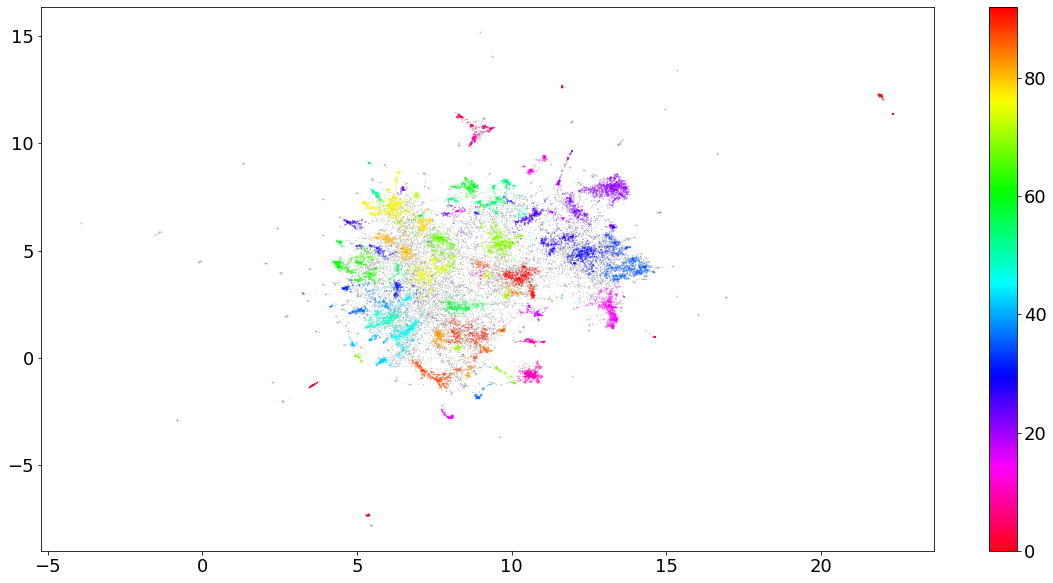

In [14]:
plot_clusters(umap_2d, model.labels_)

### Création des Topics

In [38]:
def class_tf_idf_topic_creation(df, cluster_labels, n=10, max_df=1.0):
    m = len(df)
    class_df = pd.DataFrame(df['text'].values, columns=['text'])
    class_df['class'] = cluster_labels
    class_df['ID'] = range(len(class_df))
    class_df = class_df[class_df['class'] != -1]
    sent_per_class = class_df.groupby(['class'], 
                                      as_index=False).agg({'text': ' '.join})
    count = CountVectorizer(stop_words='english', 
                            max_df=max_df).fit(sent_per_class.text.values)
    t = count.transform(sent_per_class.text.values).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)
    words = count.get_feature_names()
    classes = list(sent_per_class['class'])
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) \
                           for j in indices[i]][::-1] \
                   for i, label in enumerate(classes)}
    return top_n_words

df['cluster'] = model.labels_
top_n_words = class_tf_idf_topic_creation(df, model.labels_)
tf_idf= pd.DataFrame(top_n_words).T
tf_idf = tf_idf.apply(lambda x : x.apply(lambda x : (x[0], round(x[1],3))), axis = 0)
tf_idf["cluster"] = [i for i in range(0, len(top_n_words))]
tf_idf["size"] = df.cluster.value_counts().reset_index().sort_values(by = "index").iloc[1:].cluster.values
tf_idf.columns = ["top words n1", "top words n2", "top words n3", "top words n4", "top words n5", "top words n6", "top words n7", "top words n8", "top words n9", "top words n10",'cluster', 'size']
tf_idf.to_csv("TF-IDF-topwords_2.csv")
tf_idf.to_excel("TF-IDF.xlsx")


### Annotation des clusters

In [41]:
df_c = pd.read_csv("data/TF-IDF_annotated.csv", sep = ";")
df_c[['top words n1',
       'top words n2', 'top words n3', 'top words n4', 'top words n5',
       'top words n6', 'top words n7', 'top words n8', 'top words n9',
       'top words n10']] = df_c[['top words n1',
       'top words n2', 'top words n3', 'top words n4', 'top words n5',
       'top words n6', 'top words n7', 'top words n8', 'top words n9',
       'top words n10']].apply(lambda x : x.apply(lambda x : x.split("'")[1]))
d = df.merge(df_c, left_on = "cluster", right_on = "cluster")
d = d[['title', 'link', 'date', 'author',  'Unnamed: 13']]
d = d.rename({'Unnamed: 13' : "cluster"}, axis = 1)
d.to_csv("data/data_final.csv")
df_c

,Unnamed: 0,top words n1,top words n2,top words n3,top words n4,top words n5,top words n6,top words n7,top words n8,top words n9,top words n10,cluster,size,Unnamed: 13
0,22,portfolio,returns,risk,volatility,return,strategy,portfolios,stock,stocks,market,22,910,Finance and Risk Management
1,52,bayesian,posterior,distribution,prior,stan,probability,normal,mcmc,likelihood,priors,52,733,Statistics
2,66,conference,talks,talk,user,community,consortium,group,meetup,event,meeting,66,661,Conferences
3,51,game,probability,numbers,puzzle,player,solution,number,sum,problem,sequence,51,599,Probabilities problems
4,36,map,maps,spatial,raster,leaflet,sf,coordinates,polygons,area,ggmap,36,560,Geography and Spatial Data
5,56,regression,linear,mathbf,boldsymbol,models,logistic,variable,fit,poisson,survival,56,538,Linear Models
6,50,ggplot2,ggplot,plot,plots,axis,bar,color,labels,graphics,chart,50,497,ggplot2
7,86,cran,packages,install,version,dependencies,downloads,installed,devel,github,file,86,454,"Intall, load and update packages"
8,75,revolution,analytics,enterprise,sas,webinar,hadoop,big,microsoft,spss,open,75,444,Business newsletters and webinars
9,18,temperature,stations,climate,weather,station,year,co2,water,solar,energy,18,420,Ecology


### Thématiques par auteurs


#### Francois Husson

<AxesSubplot:>

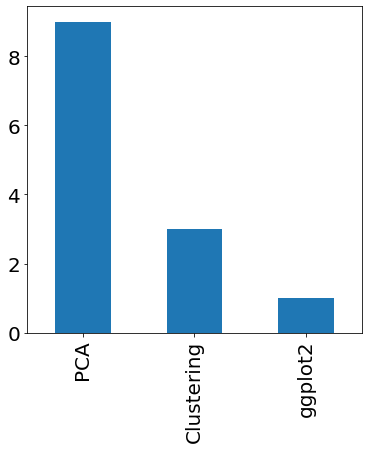

In [59]:
d[d.author == "francoishusson"].cluster.value_counts().head(10).plot.bar(
    fontsize=20,
    figsize=(6, 6), label ="")

In [56]:
topics = d.loc[d.author == "francoishusson", "cluster"]
df_c[df_c["Unnamed: 13"].isin(topics)]

,Unnamed: 0,top words n1,top words n2,top words n3,top words n4,top words n5,top words n6,top words n7,top words n8,top words n9,top words n10,cluster,size,Unnamed: 13
6,50,ggplot2,ggplot,plot,plots,axis,bar,color,labels,graphics,chart,50,497,ggplot2
38,9,clusters,clustering,cluster,algorithm,distance,means,hierarchical,pokemon,kmeans,points,9,127,Clustering
55,10,pca,principal,components,component,variables,pcs,variance,matrix,pc,pcr,10,78,PCA


#### Arthur Charpentien

<AxesSubplot:>

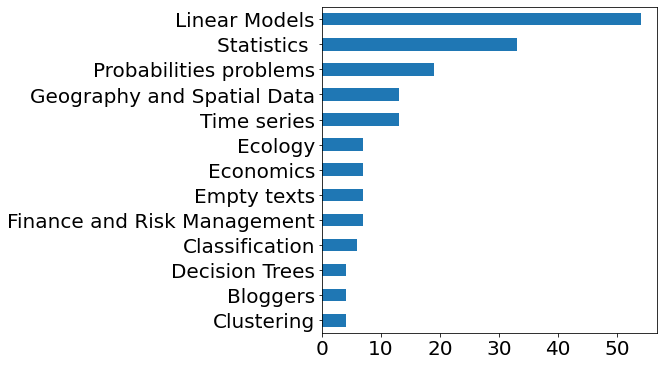

In [106]:
d[d.author == "arthur charpentier"].cluster.value_counts().sort_values().tail(13).plot.barh(
    fontsize=20,
    figsize=(6, 6), label ="")

#### Tal Galili

<AxesSubplot:>

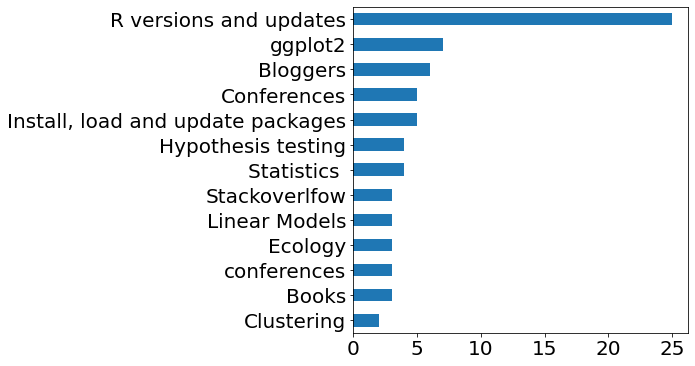

In [105]:
d[d.author == "Tal Galili"].cluster.value_counts().sort_values().tail(13).plot.barh(
    fontsize=20,
    figsize=(6, 6), label ="")



#### R-views

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

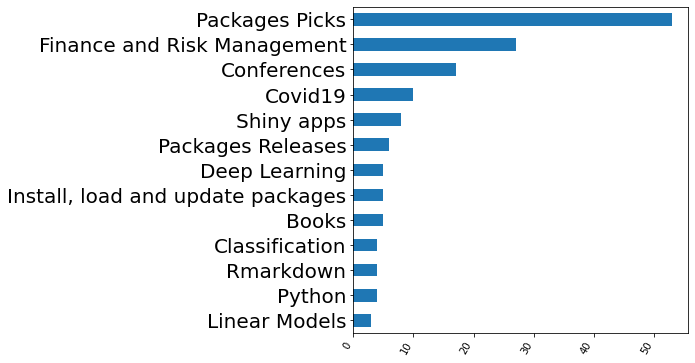

In [104]:
d[d.author == "R Views"].cluster.value_counts().sort_values().tail(13).plot.barh(
    fontsize=20,
    figsize=(6, 6), label ="")
plt.xticks(
    rotation=60,
    horizontalalignment='right',
    fontweight='light',
    fontsize='small',
)
